In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")
sns.set_theme()

# Cargar datos
df = pd.read_csv("../nibss_fraud_dataset.csv")

print(f"Tamaño del dataset: {df.shape}")
df.head()

Tamaño del dataset: (1000000, 38)


,transaction_id,customer_id,timestamp,amount,channel,merchant_category,bank,location,age_group,hour,...,hour_cos,day_sin,day_cos,month_sin,month_cos,amount_log,amount_rounded,velocity_score,merchant_risk_score,composite_risk
0,TXN_F08A86FFD87C,CUST_0002AED1,2023-01-14 04:31:09,32266.83,Mobile,Grocery,Sterling,Other,30-39,4,...,0.500000,-0.974928,-0.222521,0.500000,0.866025,10.381826,0,0.189369,0.215000,0.070560
1,TXN_C2D08134EC83,CUST_0002AED1,2023-01-17 11:20:13,72530.49,Web,Entertainment,UBA,Other,30-39,11,...,-0.965926,0.781831,0.623490,0.500000,0.866025,11.191776,0,0.425671,0.877424,0.276849
2,TXN_B9499111901D,CUST_0002AED1,2023-01-22 02:17:46,168152.87,Mobile,Transport,Wema,Other,30-39,2,...,0.866025,-0.781831,0.623490,0.500000,0.866025,12.032635,0,0.986866,0.440230,0.163649
3,TXN_48DB1D526A3B,CUST_0002AED1,2023-01-24 08:18:23,16439.93,Mobile,Entertainment,FCMB,Other,30-39,8,...,-0.500000,0.781831,0.623490,0.500000,0.866025,9.707529,0,0.096484,0.877424,0.266315
4,TXN_56DB1E28B758,CUST_0002AED1,2023-02-01 15:39:53,9922.68,POS,Education,FirstBank,Other,30-39,15,...,-0.707107,0.974928,-0.222521,0.866025,0.500000,9.202679,0,0.058235,0.231291,0.071251


In [2]:
# Nombre y tipo de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 38 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   transaction_id        1000000 non-null  object 
 1   customer_id           1000000 non-null  object 
 2   timestamp             1000000 non-null  object 
 3   amount                1000000 non-null  float64
 4   channel               1000000 non-null  object 
 5   merchant_category     1000000 non-null  object 
 6   bank                  1000000 non-null  object 
 7   location              1000000 non-null  object 
 8   age_group             1000000 non-null  object 
 9   hour                  1000000 non-null  int64  
 10  day_of_week           1000000 non-null  int64  
 11  month                 1000000 non-null  int64  
 12  is_weekend            1000000 non-null  bool   
 13  is_peak_hour          1000000 non-null  bool   
 14  tx_count_24h          1000000 non-n

Porcentaje de fraudes: 0.3%


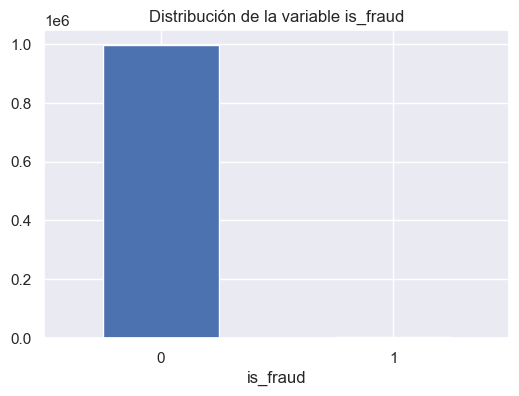

In [8]:
# Distribución de la variable objetivo

fraud_counts = df["is_fraud"].value_counts()
fraud_percentage = fraud_counts[1] / len(df) * 100

print(f"Porcentaje de fraudes: {fraud_percentage}%")

# Visualización
plt.figure(figsize=(6,4))
fraud_counts.plot(kind="bar")
plt.title("Distribución de la variable is_fraud")
plt.xticks(rotation=0)
plt.show()


In [10]:
# Análisis estadístico de variables numéricas
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].describe()

,amount,hour,day_of_week,month,tx_count_24h,amount_sum_24h,amount_mean_7d,amount_std_7d,tx_count_total,amount_mean_total,...,hour_cos,day_sin,day_cos,month_sin,month_cos,amount_log,amount_rounded,velocity_score,merchant_risk_score,composite_risk
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.569514e+05,12.228639,3.013070,6.609283,1.282159,1.991769e+05,1.557863e+05,1.112951e+05,100.985146,156224.102273,...,-0.466445,-0.001601,-0.003539,3.397843e-02,1.272586e-02,11.110517,0.000079,1.905117,0.395645,0.151286
std,3.263590e+05,4.798625,1.997767,3.464179,0.533265,3.742924e+05,2.184174e+05,2.091671e+05,9.900881,32450.494993,...,0.589371,0.707580,0.706623,7.197222e-01,6.933142e-01,1.302152,0.008888,3.915378,0.238704,0.087124
min,1.685500e+02,0.000000,0.000000,1.000000,1.000000,1.685500e+02,2.128300e+02,0.000000e+00,61.000000,79531.073708,...,-1.000000,-0.974928,-0.900969,-1.000000e+00,-1.000000e+00,5.133148,0.000000,0.001077,0.121274,0.036431
25%,2.800042e+04,9.000000,1.000000,3.000000,1.000000,3.617210e+04,5.327417e+04,1.421574e+04,94.000000,133244.011525,...,-0.866025,-0.781831,-0.900969,-5.000000e-01,-5.000000e-01,10.240010,0.000000,0.246675,0.202718,0.078078
50%,6.667998e+04,12.000000,3.000000,7.000000,1.000000,8.971861e+04,9.779375e+04,5.121962e+04,101.000000,151366.221635,...,-0.707107,0.000000,-0.222521,-2.449294e-16,6.123234e-17,11.107675,0.000000,0.681163,0.369588,0.135629
75%,1.595289e+05,15.000000,5.000000,10.000000,1.000000,2.150990e+05,1.795145e+05,1.246082e+05,107.000000,174289.988391,...,-0.258819,0.781831,0.623490,8.660254e-01,5.000000e-01,11.979987,0.000000,1.915726,0.542436,0.196458
max,1.792681e+07,23.000000,6.000000,12.000000,6.000000,1.326406e+07,1.000000e+07,4.998794e+06,140.000000,380508.803514,...,1.000000,0.974928,1.000000,1.000000e+00,1.000000e+00,16.701808,1.000000,191.519506,0.877424,0.734583


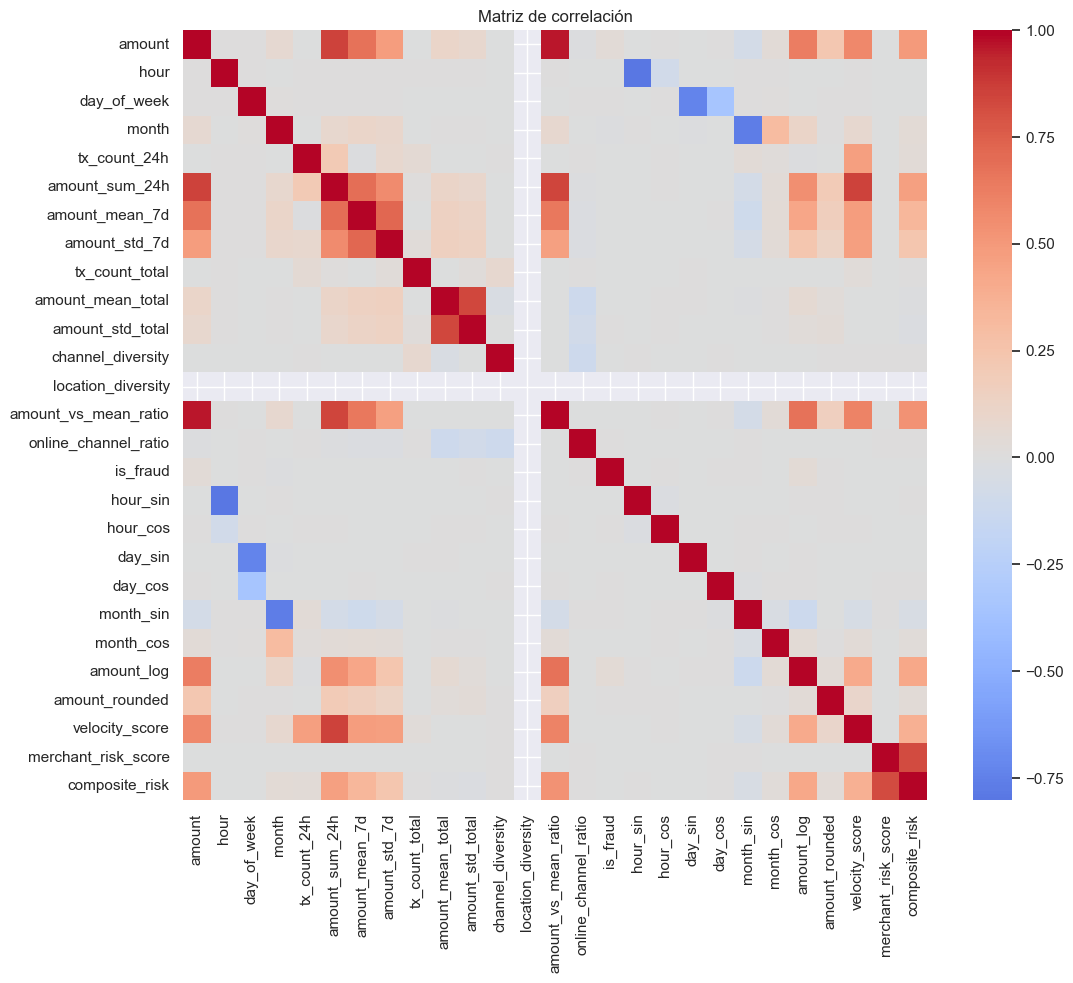

In [11]:
# Correlación entre variables numéricas
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()

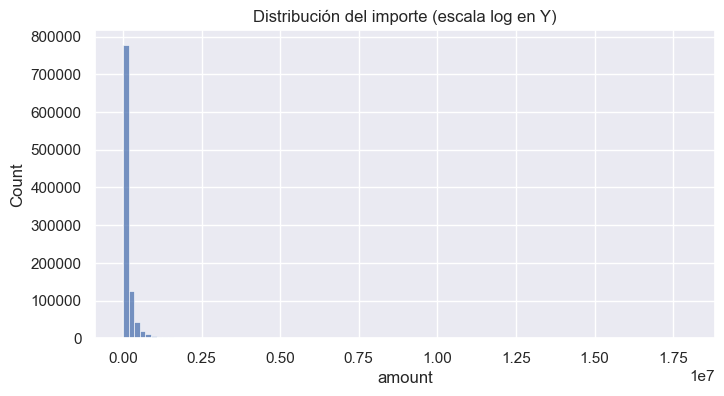

In [20]:
# Distribución del importe de transacción
plt.figure(figsize=(8,4))
sns.histplot(df["amount"], bins=100)
plt.title("Distribución del importe (escala log en Y)")
plt.show()

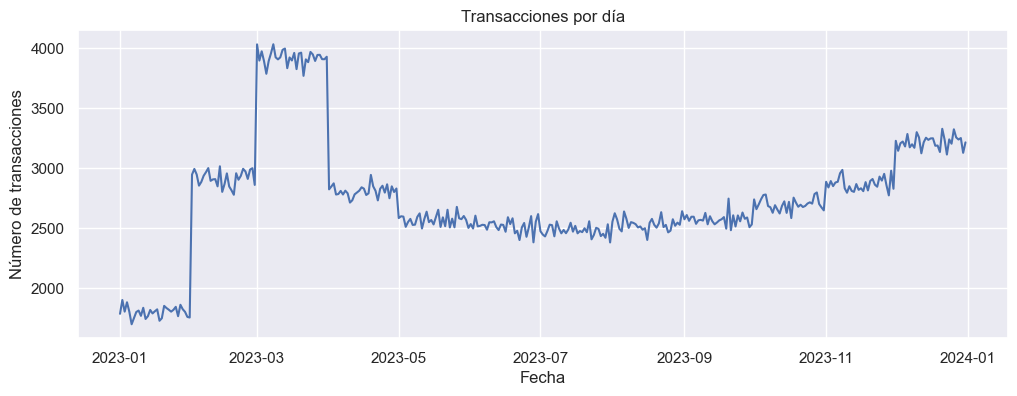

In [21]:
# Distribución temporal
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

df["date"] = df["timestamp"].dt.date
tx_per_day = df.groupby("date").size()

plt.figure(figsize=(12,4))
tx_per_day.plot()
plt.title("Transacciones por día")
plt.xlabel("Fecha")
plt.ylabel("Número de transacciones")
plt.show()